# 2. Logistic Regression
   Logistic Regression is a binary classification model often used for churn prediction. It estimates the likelihood of churn based on features like subscription length, number of complaints, and usage frequency.


In [21]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [22]:
# 2. Load the dataset

# Read the dataset from CSV files
X_train = pd.read_csv("../2_data/X_train.csv")
X_test = pd.read_csv("../2_data/X_test.csv")
y_train = pd.read_csv("../2_data/y_train.csv")
y_test = pd.read_csv("../2_data/y_test.csv")

# Ensure the target variable has the correct shape (1D array)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [23]:
# 3. Initialize and train the Logistic Regression model

# Initialize the Logistic Regression model
lr = LogisticRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

/Users/canis/Library/CloudStorage/OneDrive-Persönlich/Dokumente/programme/coding/github/telco-customer-churn/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation and evaluate the model
accuracy_scores = cross_val_score(lr, X_train, y_train, cv=10, scoring='accuracy')
precision_scores = cross_val_score(lr, X_train, y_train, cv=10, scoring='precision')
recall_scores = cross_val_score(lr, X_train, y_train, cv=10, scoring='recall')
f1_scores = cross_val_score(lr, X_train, y_train, cv=10, scoring='f1')
roc_auc_scores = cross_val_score(lr, X_train, y_train, cv=10, scoring='roc_auc')

# Calculate the averages
average_scores = {
    'accuracy': accuracy_scores.mean(),
    'precision': precision_scores.mean(),
    'recall': recall_scores.mean(),
    'f1': f1_scores.mean(),
    'roc_auc': roc_auc_scores.mean()
}

# Convert the averages to a DataFrame
average_scores_df = pd.DataFrame([average_scores])

# Save the averages to a CSV file
average_scores_df.to_csv("../2_data/evaluation_metrics/LogisticRegression_cv.csv", index=False)

/Users/canis/Library/CloudStorage/OneDrive-Persönlich/Dokumente/programme/coding/github/telco-customer-churn/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/canis/Library/CloudStorage/OneDrive-Persönlich/Dokumente/programme/coding/github/telco-customer-churn/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-le

In [25]:
# 4. Make predictions

# Predict on the testing data
y_pred = lr.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.80
Precision: 0.69
Recall: 0.43
F1: 0.53
ROC AUC: 0.68


In [27]:
evaluation_metrics = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "roc_auc": roc_auc
}
evaluation_df = pd.DataFrame([evaluation_metrics])
evaluation_df.to_csv("../2_data/evaluation_metrics/LogisticRegression_prediction.csv", index=False)


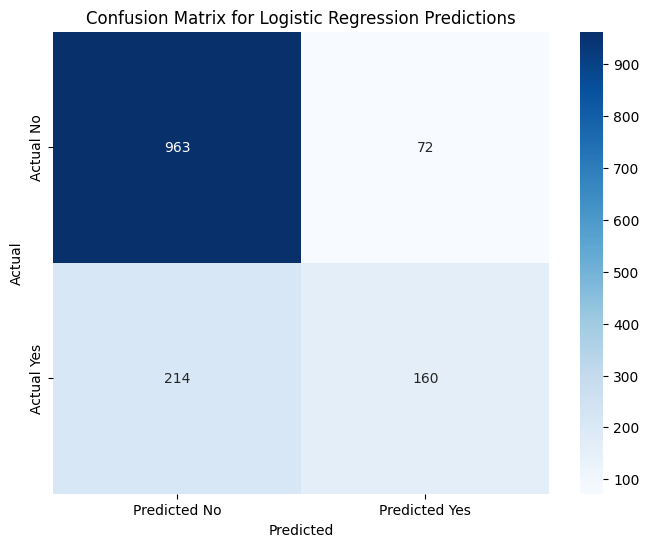

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Predictions')
plt.show()

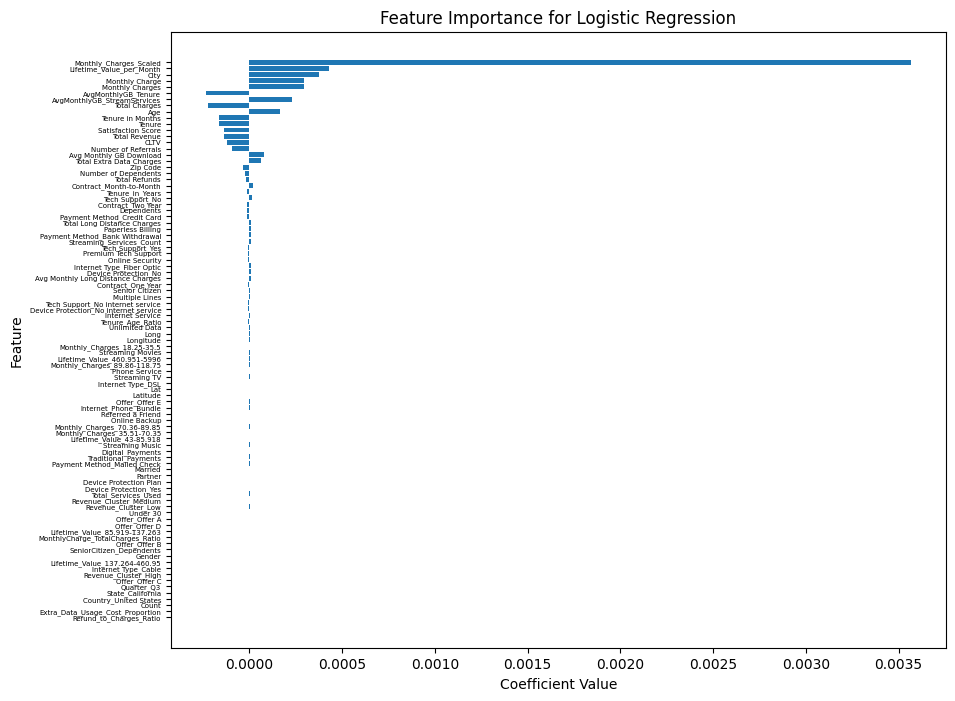

In [29]:
# Get the feature names
feature_names = X_train.columns

# Get the coefficients from the logistic regression model
coefficients = lr.coef_[0]

# Create a DataFrame to hold feature names and their corresponding coefficients
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})

# Sort the DataFrame by the absolute value of the coefficients
feature_importance_df['Absolute Importance'] = feature_importance_df['Importance'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Absolute Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.yticks(fontsize=5)
plt.title('Feature Importance for Logistic Regression')
plt.gca().invert_yaxis()
plt.show()